IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME04: Programmation du kernel perceptron

Le but de ce TP est de terminer l'extension de l'algoritheme du perceptron à l'aide de noyaux, avant de commencer à étudier les données du projet.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

SALEH Sarah, OHOUENS Ryan

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-04-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Mise à jour de votre librairie IADS

Comme lors de la séance précédente, vous devez utiliser les fonctions de la librairie IADS.

<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Rajouter dans la librairie les fonctions et classes et que vous avez écrites lors de la séance précédente. 

**Rappel**: dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME en cours. La séance suivante, vous rajouterez tout cela, une fois que vous l'aurez bien testé, dans vos fichiers de la librairie IADS.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl


In [74]:
def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1

def plot_frontiere(set,classifier,step=50):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])
    
# ------------------------ 

def createGaussianDataset(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    """ 
        rend un LabeledSet 2D généré aléatoirement.
        Arguments:
        - positive_center (vecteur taille 2): centre de la gaussienne des points positifs
        - positive_sigma (matrice 2*2): variance de la gaussienne des points positifs
        - negative_center (vecteur taille 2): centre de la gaussienne des points négative
        - negative_sigma (matrice 2*2): variance de la gaussienne des points négative
    - nb_points (int):  nombre de points de chaque classe à générer
"""
#TODO: A Compléter
    x, y = np.random.multivariate_normal(positive_center, positive_sigma, nb_points).T
    a, b = np.random.multivariate_normal(negative_center, negative_sigma, nb_points).T
    label = ls.LabeledSet(2)
    for i in range(len(a)):
        label.addExample(np.array([x[i], y[i]]), 1)
        label.addExample(np.array([a[i], b[i]]),-1)
    return label

    raise NotImplementedError("Please Implement this method")
    
# Exemple d'utilisation de utils

the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)



def super_entrainement(n, label, perceptron) :
    x = []
    y = []
    for i in range(n) :
        train, test = split(label)
        print(str(i) + " entrainement")
        perceptron.train(train)
        train = perceptron.accuracy(test)
        print("Accuracy "+str(train)+"%\n")
        y.append(train)
        x.append(i)
    plt.plot(x,y)
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.title('performances accuracy')
    plt.legend()
    plt.show()
    plot_frontiere(test,perceptron)
    plot2DSet(test)

    
    # Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

In [75]:
def split(label,pourcentage=60) :

    size = label.size()

    label_train = ls.LabeledSet(label.getInputDimension())
    label_test = ls.LabeledSet(label.getInputDimension())
    
    indice = np.arange(label.size())
    temoin = np.random.permutation(indice)
    
    for i in range(len(temoin)) :
        if (i < pourcentage*len(temoin)/100):
            label_train.addExample(label.getX(i), label.getY(i))
        else : 
            label_test.addExample(label.getX(i), label.getY(i))

    return (label_train, label_test)

 

train, test = split(the_set)
affiche_base(the_set)
affiche_base(test)
affiche_base(train)

Exemple 0
('\tdescription : ', array([0.66084564, 0.48644289]))
('\tlabel : ', array([1]))
Exemple 1
('\tdescription : ', array([-2.35223841, -0.63813582]))
('\tlabel : ', array([-1]))
Exemple 2
('\tdescription : ', array([-0.64966457, -0.34666712]))
('\tlabel : ', array([1]))
Exemple 3
('\tdescription : ', array([ 0.02827859, -1.87046716]))
('\tlabel : ', array([-1]))
Exemple 4
('\tdescription : ', array([-0.48608698,  0.50183293]))
('\tlabel : ', array([1]))
Exemple 5
('\tdescription : ', array([-1.24522916,  0.07045761]))
('\tlabel : ', array([-1]))
Exemple 6
('\tdescription : ', array([0.73844658, 1.43519474]))
('\tlabel : ', array([1]))
Exemple 7
('\tdescription : ', array([ 0.50429209, -1.48941332]))
('\tlabel : ', array([-1]))
Exemple 8
('\tdescription : ', array([1.64173686, 2.25401653]))
('\tlabel : ', array([1]))
Exemple 9
('\tdescription : ', array([-0.6481983 , -1.90254846]))
('\tlabel : ', array([-1]))
Exemple 10
('\tdescription : ', array([1.65554643, 1.25216769]))
('\tla

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [7]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(the_set.getX(1))


array([-1.43879261, -0.52936507,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [72]:
class ClassifierPerceptronKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.e = learning_rate
        self.w = np.random.rand(1, dimension_kernel)
        self.dimension = dimension_kernel
        self.kernel = kernel
        self.loss = 0
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        data = self.kernel.transform(x)
        if(np.dot(self.w, data) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            data = self.kernel.transform(labeledSet.getX(i))
            obtenu = self.predict(labeledSet.getX(i))
            if(obtenu != labeledSet.getY(i)):
                self.w = self.w + self.e*labeledSet.getY(i)*data
            self.loss += (labeledSet.getY(i) - np.dot(self.w, data)) * (labeledSet.getY(i) - np.dot(self.w, data))
        print(str(self.loss) +" loss")
        self.loss = 0

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

0 entrainement
[2128.71545181] loss
Accuracy 50.0%

1 entrainement
[1587.62737553] loss
Accuracy 50.0%

2 entrainement
[1078.82290853] loss
Accuracy 50.0%

3 entrainement
[669.48181642] loss
Accuracy 50.0%

4 entrainement
[397.3436864] loss
Accuracy 61.25%

5 entrainement
[231.95038405] loss
Accuracy 73.75%

6 entrainement
[147.39643789] loss
Accuracy 82.5%

7 entrainement
[110.50320514] loss
Accuracy 87.5%

8 entrainement
[94.22249297] loss
Accuracy 88.75%

9 entrainement
[85.35745737] loss
Accuracy 88.75%

10 entrainement
[80.80715312] loss
Accuracy 88.75%

11 entrainement
[76.07936366] loss
Accuracy 88.75%

12 entrainement
[76.96429694] loss
Accuracy 88.75%

13 entrainement
[76.33977542] loss
Accuracy 88.75%

14 entrainement
[72.96432157] loss
Accuracy 88.75%

15 entrainement
[72.09612965] loss
Accuracy 88.75%

16 entrainement
[71.00318374] loss
Accuracy 88.75%

17 entrainement
[70.64947315] loss
Accuracy 90.0%

18 entrainement
[70.7205596] loss
Accuracy 90.0%

19 entrainement
[69.6

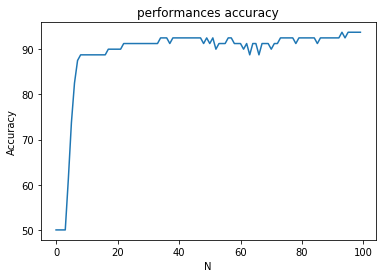

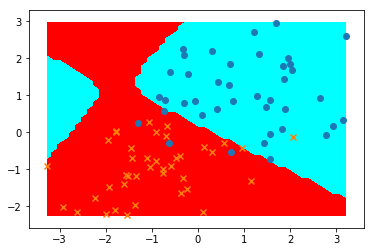

In [76]:
class KernelPoly:
    def transform(self,x):
       ##TODO
        y=np.asarray([1,x[0],x[1],x[0]*x[0],x[1]*x[1], x[0] * x[1] ])
        return y  

N=100
k=KernelPoly()
perceptron_k=ClassifierPerceptronKernel(6,0.001,k)

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION
super_entrainement(100, the_set, perceptron_k)


#De même pour le perceptron, lorsque l'accuracy augmente, le loss diminue.
#Ici, le loss diminue de plus de 90%.

In [41]:
#Gradient stochastique

class ClassifierGradientStochastique(cl.Classifier):
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.e = learning_rate
        self.w = np.random.rand(1, input_dimension)
        self.dimension = input_dimension
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        if(np.dot(self.w, x) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            self.w = self.w + self.e*(labeledSet.getY(i) - np.dot(self.w,labeledSet.getX(i)))*labeledSet.getX(i)
  

0 entrainement
Accuracy 89.6739130435%

1 entrainement
Accuracy 90.2173913043%

2 entrainement
Accuracy 89.1304347826%

3 entrainement
Accuracy 90.7608695652%

4 entrainement
Accuracy 88.5869565217%

5 entrainement
Accuracy 89.6739130435%

6 entrainement
Accuracy 89.1304347826%

7 entrainement
Accuracy 90.2173913043%

8 entrainement
Accuracy 90.7608695652%

9 entrainement
Accuracy 89.1304347826%

10 entrainement
Accuracy 90.7608695652%

11 entrainement
Accuracy 90.2173913043%

12 entrainement
Accuracy 89.1304347826%

13 entrainement
Accuracy 89.6739130435%

14 entrainement
Accuracy 89.6739130435%

15 entrainement
Accuracy 88.5869565217%

16 entrainement
Accuracy 90.2173913043%

17 entrainement
Accuracy 89.6739130435%

18 entrainement
Accuracy 88.0434782609%

19 entrainement
Accuracy 89.6739130435%

20 entrainement
Accuracy 88.5869565217%

21 entrainement
Accuracy 89.6739130435%

22 entrainement
Accuracy 88.5869565217%

23 entrainement
Accuracy 89.6739130435%

24 entrainement
Accuracy 9

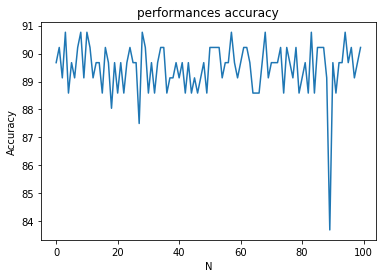

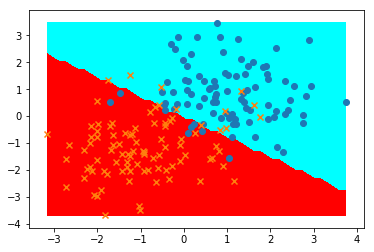

In [43]:
#Entrainement pour le gradient stochastique
the_setgs = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),230)
gs = ClassifierGradientStochastique(2, 0.05)
super_entrainement(100, the_setgs, gs)

#Il faut baisser le epsilon pour que la frontière de décison soit cohérente.

In [65]:
#Gradient batch

class ClassifierGradientBatch(cl.Classifier):
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.e = learning_rate
        self.w = np.random.rand(1, input_dimension)
        self.dimension = input_dimension
        self.gradient = 0
        self.loss = 0
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        if(np.dot(self.w, x) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            self.gradient += (labeledSet.getY(i) - np.dot(self.w,labeledSet.getX(i)))*labeledSet.getX(i)
            self.loss += (labeledSet.getY(i) - np.dot(self.w, labeledSet.getX(i))) * (labeledSet.getY(i) - np.dot(self.w, labeledSet.getX(i)))
        self.w = self.w + self.e * self.gradient
        print(str(self.loss)+" loss")
        self.loss = 0

0 entrainement
[268.62354038] loss
Accuracy 91.1585365854%

1 entrainement
[268.53695772] loss
Accuracy 91.1585365854%

2 entrainement
[268.36397536] loss
Accuracy 91.1585365854%

3 entrainement
[268.10495879] loss
Accuracy 91.1585365854%

4 entrainement
[267.76045508] loss
Accuracy 91.1585365854%

5 entrainement
[267.33119151] loss
Accuracy 91.1585365854%

6 entrainement
[266.81807373] loss
Accuracy 91.1585365854%

7 entrainement
[266.22218347] loss
Accuracy 91.1585365854%

8 entrainement
[265.54477583] loss
Accuracy 91.1585365854%

9 entrainement
[264.7872761] loss
Accuracy 91.1585365854%

10 entrainement
[263.95127617] loss
Accuracy 91.1585365854%

11 entrainement
[263.03853052] loss
Accuracy 91.1585365854%

12 entrainement
[262.05095182] loss
Accuracy 91.1585365854%

13 entrainement
[260.9906061] loss
Accuracy 91.1585365854%

14 entrainement
[259.8597076] loss
Accuracy 91.1585365854%

15 entrainement
[258.66061316] loss
Accuracy 91.1585365854%

16 entrainement
[257.39581633] loss
A

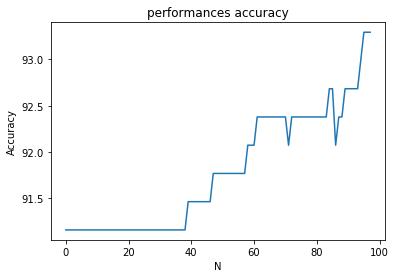

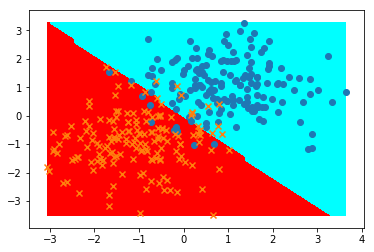

In [71]:
#Entrainement pour le gradient batch
the_setgb = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),410)
gb = ClassifierGradientBatch(2, 0.0000005)
super_entrainement(98, the_setgb, gb)

#Pour le gradient batch, il faut un espilon plus petit que pour le gradient stochastique car le changement de w à chaque entrainement nous donnait une accuracy périodique variant de 90% à moins de 10%.
#L'accuracy est liée au loss, quand l'accuracy augmente le coût du loss baisse et réciproquement si elle augmente.

In [44]:
#Gradient stochastique kernel

class ClassifierGradientStochastiqueKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.e = learning_rate
        self.w = np.random.rand(1, dimension_kernel)
        self.dimension = dimension_kernel
        self.kernel = kernel
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        data = self.kernel.transform(x)
        if(np.dot(self.w, data) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            data = self.kernel.transform(labeledSet.getX(i))
            self.w = self.w + self.e*(labeledSet.getY(i) - np.dot(self.w,data))*data
  

0 entrainement
Accuracy 89.9193548387%

1 entrainement
Accuracy 93.5483870968%

2 entrainement
Accuracy 93.1451612903%

3 entrainement
Accuracy 93.9516129032%

4 entrainement
Accuracy 93.5483870968%

5 entrainement
Accuracy 93.5483870968%

6 entrainement
Accuracy 93.5483870968%

7 entrainement
Accuracy 93.5483870968%

8 entrainement
Accuracy 93.9516129032%

9 entrainement
Accuracy 94.3548387097%

10 entrainement
Accuracy 93.9516129032%

11 entrainement
Accuracy 93.1451612903%

12 entrainement
Accuracy 93.9516129032%

13 entrainement
Accuracy 93.5483870968%

14 entrainement
Accuracy 93.5483870968%

15 entrainement
Accuracy 92.7419354839%

16 entrainement
Accuracy 93.9516129032%

17 entrainement
Accuracy 94.7580645161%

18 entrainement
Accuracy 93.5483870968%

19 entrainement
Accuracy 93.5483870968%

20 entrainement
Accuracy 93.5483870968%

21 entrainement
Accuracy 93.9516129032%

22 entrainement
Accuracy 92.7419354839%

23 entrainement
Accuracy 92.7419354839%

24 entrainement
Accuracy 9

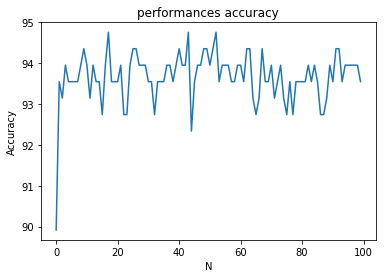

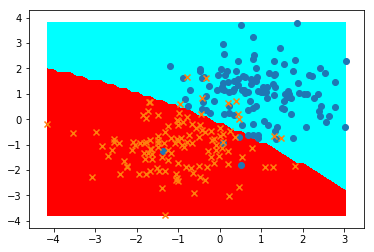

In [47]:
#Entrainement pour le gradient stochastique kernel
the_setgsk = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),310)
k=KernelPoly()
gsk = ClassifierGradientStochastiqueKernel(6, 0.005, k)

super_entrainement(100, the_setgsk, gsk)

In [69]:
#Gradient batch kernel

class ClassifierGradientBatchKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.e = learning_rate
        self.w = np.random.rand(1, dimension_kernel)
        self.dimension = dimension_kernel
        self.kernel = kernel
        self.gradient = 0
        self.loss = 0
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        data = self.kernel.transform(x)
        if(np.dot(self.w, data) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            data = self.kernel.transform(labeledSet.getX(i))
            self.gradient = (labeledSet.getY(i) - np.dot(self.w,data))*data
            self.loss += (labeledSet.getY(i) - np.dot(self.w, data)) * (labeledSet.getY(i) - np.dot(self.w, data)) 
        self.w = self.w + self.e * self.gradient
        print(str(self.loss) + " loss")
        self.loss = 0

0 entrainement
[6091.36882731] loss
Accuracy 50.0%

1 entrainement
[5611.28653839] loss
Accuracy 50.0%

2 entrainement
[5530.04141498] loss
Accuracy 50.0%

3 entrainement
[3988.22405163] loss
Accuracy 50.0%

4 entrainement
[3015.50280939] loss
Accuracy 50.0%

5 entrainement
[2537.57336758] loss
Accuracy 50.0%

6 entrainement
[2160.27454589] loss
Accuracy 50.0%

7 entrainement
[2034.87889508] loss
Accuracy 50.0%

8 entrainement
[2007.3766846] loss
Accuracy 50.0%

9 entrainement
[1891.91509678] loss
Accuracy 50.0%

10 entrainement
[1837.00667888] loss
Accuracy 50.0%

11 entrainement
[1646.31202563] loss
Accuracy 50.0%

12 entrainement
[1586.9138817] loss
Accuracy 50.4032258065%

13 entrainement
[1467.69951838] loss
Accuracy 50.4032258065%

14 entrainement
[1457.51684347] loss
Accuracy 52.8225806452%

15 entrainement
[1386.94712352] loss
Accuracy 52.8225806452%

16 entrainement
[1390.08503589] loss
Accuracy 58.4677419355%

17 entrainement
[1119.55117039] loss
Accuracy 66.1290322581%

18 e

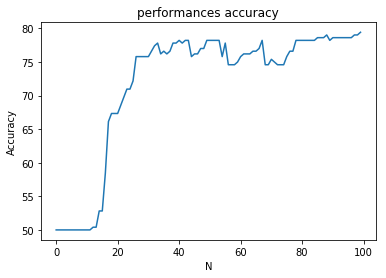

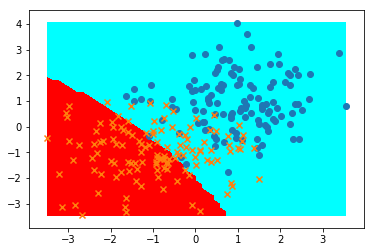

In [70]:
#Entrainement pour le gradient batch kernel
the_setgbk = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),310)
k=KernelPoly()
gbk = ClassifierGradientBatchKernel(6, 0.005, k)

super_entrainement(100, the_setgbk, gbk)

#Pour le gradient batch kernel, il faut un epsilon plus éleve que pour le gradient batch linéaire.
#Pour le gradient batch kernel, si l'accuracy augmente, le loss diminue.

In [68]:
#Il y a donc une sensibilité liée à epsilon.

Mise en oeuvre sur des données réelles 
-------
A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.

# Préparation du projet

Le projet est à rendre lors de la dernière séance de TD-TME de votre groupe qui aura lieu la semaine du **16 avril**. Lors de cette dernière séance, une soutenance sera organisée afin que vous présentiez le travail réalisé et les résultats obtenus.



## Données

Les données à utiliser sont des données issues d'une base de films et de notations faites par des spectateurs:
- base MovieLens : https://grouplens.org/datasets/movielens/
- base complémentaire `Movie Industrie`: https://www.kaggle.com/danielgrijalvas/movies


<font color="RED">**ATTENTION**: la base est très volumineuse (plus d'1Go) et ne pourra pas tenir sur votre répertoire de travail des machines de TME.</font>

Dans un premier temps, vous travaillerez sur la version réduite de cette base (`ml-latest-small.zip` sur le site movilens) que vous pouvez récupérer sur les machines de TD-TME: `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
Cette version contient qu'une partie des lignes de la base originale.



En salle de TD-TME, vous accéderez aux données dans les fichiers suivants (à ne pas recopier !):
- répertoire : `/users/Enseignants/marsala/3i026-2019`
- répertoire des données MovieLens version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small/` 
- fichier archive avec les données MovieLesns version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
- répertoire des données MovieLens : `/users/Enseignants/marsala/3i026-2019/MovieLens/` 
  Il contient les fichiers CSV que vous pouvez ouvrir directement dans le notebook.
- fichier `/users/Enseignants/marsala/3i026-2019/kaggle-movies.csv` : infos sur les films de la base Movie Industrie
   
   
  




<font color="RED" size="+1">**[Q]**</font> Réaliser des expérimentations avec la base MovieLens version réduite.

Charger les données dans un dataframe, afficher des informations statistiques sur les données, commencer à réfléchir comment appliquer les classifieurs vus dans les séances précédentes sur ces données...

In [77]:
links = pd.read_csv('../project/ml-latest-small/links.csv')
movies = pd.read_csv('../project/ml-latest-small/movies.csv')
ratings = pd.read_csv('../project/ml-latest-small/ratings.csv')
tags = pd.read_csv('../project/ml-latest-small/tags.csv')



In [78]:
print(links)

      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
5           6   113277     949.0
6           7   114319   11860.0
7           8   112302   45325.0
8           9   114576    9091.0
9          10   113189     710.0
10         11   112346    9087.0
11         12   112896   12110.0
12         13   112453   21032.0
13         14   113987   10858.0
14         15   112760    1408.0
15         16   112641     524.0
16         17   114388    4584.0
17         18   113101       5.0
18         19   112281    9273.0
19         20   113845   11517.0
20         21   113161    8012.0
21         22   112722    1710.0
22         23   112401    9691.0
23         24   114168   12665.0
24         25   113627     451.0
25         26   114057   16420.0
26         27   114011    9263.0
27         28   114117   17015.0
28         29   112682     902.0
29        